In [1]:
import pandas as pd
import logging
import matplotlib.pyplot as plt
import numpy as np

# create an instance of the logger
logger = logging.getLogger()

# Change current directory to parent directory
import os
os.chdir("..")

In [2]:
# Define global variables
RAW_PATH_MODEL_DATA = 'data/processed/merged_with_season.csv'

# Check if the file exists
if os.path.exists(RAW_PATH_MODEL_DATA):
    # Load the file
    model_data = pd.read_csv(RAW_PATH_MODEL_DATA)
    print(model_data.head())
else:
    print("File not found:", RAW_PATH_MODEL_DATA)

              DateTime    Time_fault Fault  Time_scada  Error  \
0  2014-05-14 14:39:44  1.400096e+09    GF         NaN    NaN   
1  2014-05-14 14:50:24  1.400097e+09    GF         NaN    NaN   
2  2014-05-14 14:58:56  1.400098e+09    GF         NaN    NaN   
3  2014-05-14 15:09:36  1.400098e+09    GF         NaN    NaN   
4  2014-05-14 15:20:16  1.400099e+09    GF         NaN    NaN   

   WEC: ava. windspeed  WEC: max. windspeed  WEC: min. windspeed  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   

   WEC: ava. Rotation  WEC: max. Rotation  ...  Main Status  Sub Status  \
0                 NaN                 NaN  ...          NaN         NaN   
1                 NaN                 NaN  ...    

/var/folders/f1/tcfth2f16mv8s95myjjfx84h0000gn/T/ipykernel_88020/3408438960.py:7: DtypeWarning: Columns (2,70,71,73,74) have mixed types. Specify dtype option on import or set low_memory=False.
  model_data = pd.read_csv(RAW_PATH_MODEL_DATA)


### Occurrences of Each Fault Type

**Types of faults**

- GF (Generator Heating Fault): Indicates overheating or related issues in the generator, which could suggest an overload or poor cooling in the generator unit.

- MF (Mains Failure Fault): Reflects a failure in the main power supply, likely causing interruptions or necessitating backup power.

- FF (Feeding Fault): Relates to issues in the feeding mechanism, which might impact fuel or resource input, affecting the system’s operation.

- AF (Air Cooling Fault): Points to problems with air cooling, likely resulting in increased temperatures if the cooling system is ineffective.

- EF (Excitation Fault): would typically relate to issues in the generator's excitation system, affecting voltage regulation.

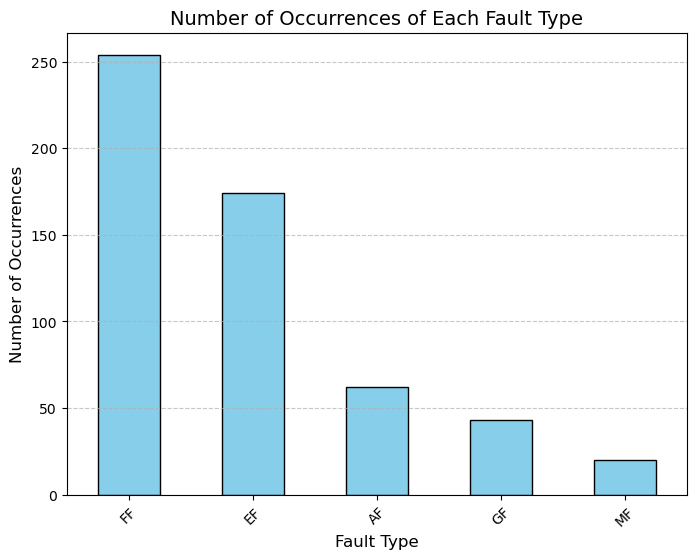

In [3]:
# Count the occurrences of each fault type
fault_counts = model_data['Fault'].value_counts()

# Plot the bar graph
plt.figure(figsize=(8, 6))
fault_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Occurrences of Each Fault Type', fontsize=14)
plt.xlabel('Fault Type', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Generator Heating Fault (GF):**
- This fault type occurs most frequently, indicating that overheating or cooling-related issues in the generator might be a prevalent problem.
- Suggests potential inefficiencies in generator maintenance or cooling mechanisms.

**Mains Failure Fault (MF):**
- Second most common fault, reflecting challenges with the main power supply.
- May imply unreliable power infrastructure or equipment dependency on external power.

**Feeding Fault (FF):**
- Occurs less often compared to GF and MF but is still significant.
- Indicates issues in the feeding mechanism, potentially affecting overall system input/output efficiency.

**Air Cooling Fault (AF):**

- Relatively low in occurrence, suggesting fewer issues with the cooling system.
- However, any occurrence might signal a need for preventive maintenance to avoid overheating.
**Excitation Fault (EF):**
- The least common fault, indicating the excitation system is generally reliable.
- Such faults, when they occur, can have critical implications for voltage regulation.

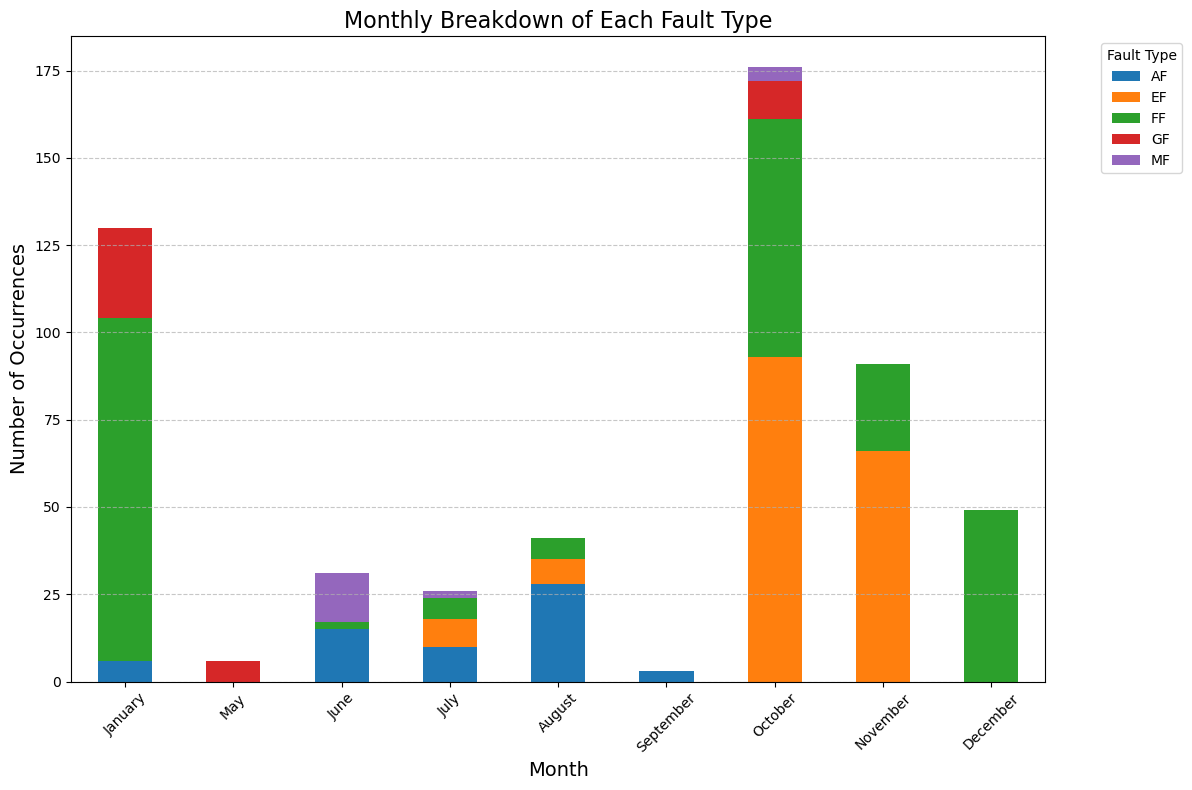

In [4]:
# Extract month names for better readability
model_data['Month'] = pd.to_datetime(model_data['DateTime']).dt.month_name()

# Group by Fault type and Month to count occurrences
fault_monthly_counts = model_data.groupby(['Fault', 'Month']).size().unstack(fill_value=0)

# Reorder months for logical sequence
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
# Dynamically reorder months based on available data
available_months = fault_monthly_counts.columns.tolist()
ordered_months = [month for month in month_order if month in available_months]
fault_monthly_counts = fault_monthly_counts[ordered_months]

# Plotting each fault type breakdown per month again
fault_monthly_counts.T.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Monthly Breakdown of Each Fault Type', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Occurrences', fontsize=14)
plt.legend(title='Fault Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

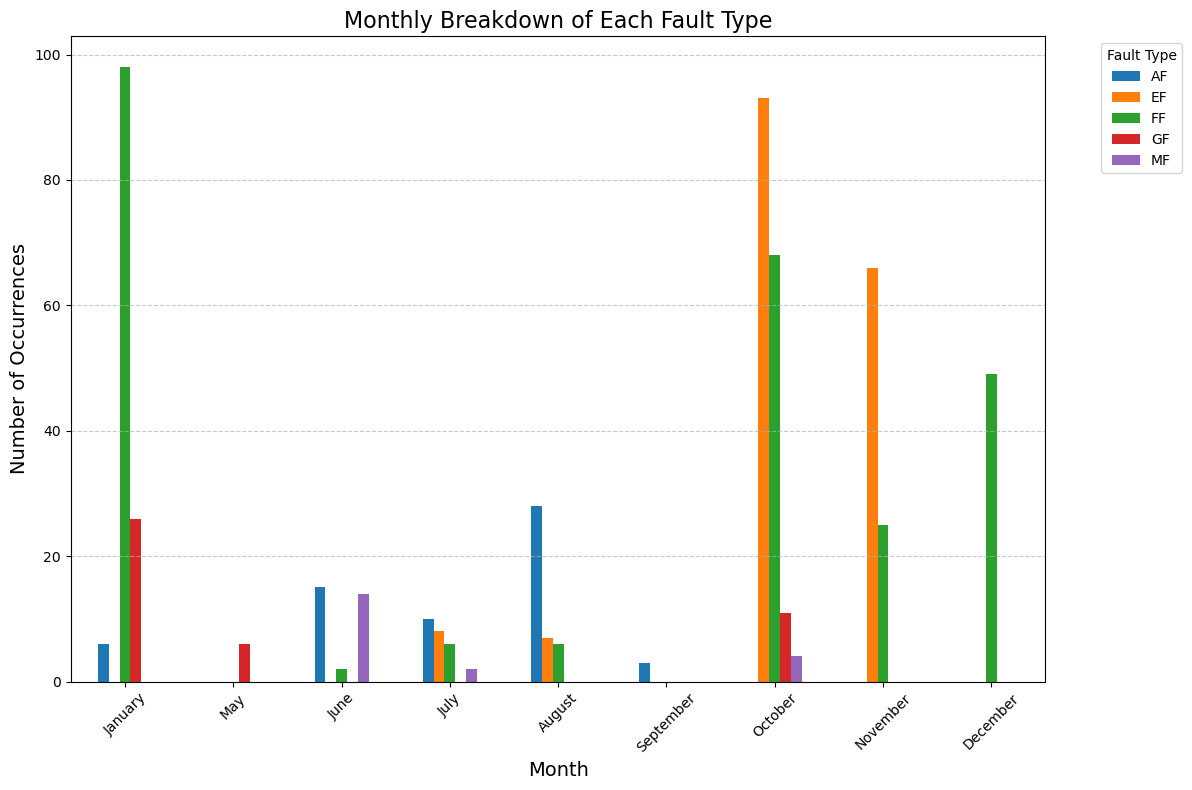

In [11]:
# Extract month names for better readability
model_data['Month'] = pd.to_datetime(model_data['DateTime']).dt.month_name()

# Group by Fault type and Month to count occurrences
fault_monthly_counts = model_data.groupby(['Fault', 'Month']).size().unstack(fill_value=0)

# Reorder months for logical sequence
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
# Dynamically reorder months based on available data
available_months = fault_monthly_counts.columns.tolist()
ordered_months = [month for month in month_order if month in available_months]
fault_monthly_counts = fault_monthly_counts[ordered_months]

# Plotting each fault type breakdown per month again
fault_monthly_counts.T.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.title('Monthly Breakdown of Each Fault Type', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Occurrences', fontsize=14)
plt.legend(title='Fault Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# High and Low Months Analysis Based on the Graph

## High Months:
### January:
- January has a significantly high occurrence of faults, dominated by **Feeding Faults (FF)**.
- Possible reasons for this spike include:
  - Operational strain after holidays or downtime.
  - Environmental conditions impacting fuel/resource input systems.

### October:
- October also shows a very high number of faults, particularly **Air Cooling Faults (AF)** and **Feeding Faults (FF)**.
- The spike in **AF** suggests:
  - Cooling systems may be under stress due to high operational loads or environmental factors like dry or hot weather.

---

## Low Months:
### May and September:
- Fault occurrences are minimal in these months across all fault types.
- Indicates stable operations, potentially due to:
  - Favorable environmental conditions.
  - Effective maintenance schedules.

### July and August:
- Occurrences are relatively sparse, with a few **Excitation Faults (EF)** and **Air Cooling Faults (AF)**.
- This suggests a moderately stable period with occasional issues, possibly related to weather or load fluctuations.

---

## Fault-Specific Observations:
1. **Feeding Fault (FF):**
   - A major contributor in both high months (January and October).
   - Indicates a recurring issue that may require dedicated investigation and preventive measures.

2. **Air Cooling Fault (AF):**
   - Peaks in October, suggesting cooling systems are under stress during this period.
   - Maintenance or upgrades to cooling mechanisms could mitigate these issues.

3. **Excitation Fault (EF):**
   - Occurs sporadically, with minor spikes in July and November.
   - These isolated events might be tied to specific operational conditions or anomalies.

4. **Mains Failure Fault (MF):**
   - Appears moderately in June but is absent in most other months.
   - Suggests isolated power supply challenges during that time.

5. **Generator Heating Fault (GF):**
   - Contributes in January but is less prominent compared to other faults.
   - Indicates fewer issues with generator cooling systems, except during high-stress periods.



## Cost Analysis of the External Maintenance

In [6]:
# Create a new column for the cost of external maintenance
model_data['Cost of External Maintenance'] = model_data['Season'].apply(
    lambda season: 50000 if season.lower() == 'low' else 150000 if season.lower() == 'high' else None
)

In [7]:
# Calculate the total cost of external maintenance for each fault type
fault_costs = model_data.groupby('Fault')['Cost of External Maintenance'].sum()

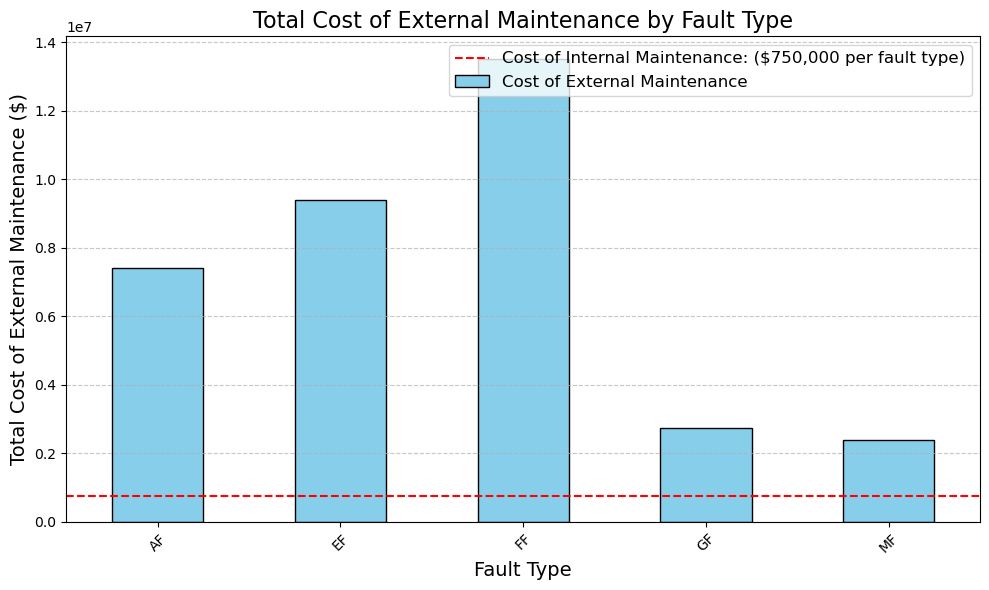

In [8]:
# Plot the fault type vs total cost of external maintenance
plt.figure(figsize=(10, 6))
fault_costs.plot(kind='bar', color='skyblue', edgecolor='black')
plt.axhline(y=750000, color='red', linestyle='--', linewidth=1.5, label='Cost of Internal Maintenance: ($750,000 per fault type)')
plt.title('Total Cost of External Maintenance by Fault Type', fontsize=16)
plt.xlabel('Fault Type', fontsize=14)
plt.ylabel('Total Cost of External Maintenance ($)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(loc='upper right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [9]:
# Calculate the total cost of external maintenance
total_external_maintenance_cost = model_data['Cost of External Maintenance'].sum()

# Print the total cost
total_external_maintenance_cost

4937350000

In [10]:
#Cost of Internal Maintenance: ($750,000 per fault type)
# Calculate the total cost of internal maintenance
total_internal_maintenance_cost=5*750000

# Print the total cost
total_internal_maintenance_cost

3750000